# SciPy 2017 Tutorials Download
### NGS L&L 25Jul17



### Jupyter Notebook Basics
>To run the code in a cell, press:
>- **Ctrl - Enter**  (stays in the current cell) *or*
>- **Shift - Enter** (advances to the next cell).

### Indexing in Python

Remember that Python is zero-indexed!

In [1]:
for num in range(3):
    print(num)

0
1
2


In [2]:
for num in range(3):
    print(num + 1)

1
2
3


In [3]:
for i in range(3,15,5):
    print(i-2)

1
6
11


### Reverse a string

> Write a loop that takes a string,
> and produces a new string with the characters in reverse order,
> so `'Newton'` becomes `'notweN'`.

In [6]:
origstr = 'Newton'
newStr = ''
for i in range(len(origstr)):
    newStr = newStr + origstr[-(i+1)]
print(newStr)

notweN


And there's always a *much* more efficient way of doing things in Python...

In [8]:
x='Newton'
print(x[::-1])

notweN


### Functions

In [9]:
# It's useful to include docstrings to describe what your function does
def say_hello(time, people):
    '''Function says a greeting. Useful for engendering goodwill'''
    return 'Good ' + time + ', ' + people

Including docstrings within functions automatically generates documentation

In [10]:
help(say_hello)

Help on function say_hello in module __main__:

say_hello(time, people)
    Function says a greeting. Useful for engendering goodwill



In [11]:
?say_hello

### Arguments
>Keyword arguments can be used to make some arguments optional by providing a default value.
>All mandatory arguments must come first, in order.

In [12]:
def say_hello(time, people='friends'):
    return 'Good ' + time + ', ' + people

In [14]:
say_hello('afternoon','coworkers')

'Good afternoon, coworkers'

## Test-Driven Development

An assertion checks that something is true at a particular point in the program.
The next step is to check the overall behavior of a piece of code,
i.e.,
to make sure that it produces the right output when it's given a particular input.
For example,
suppose we need to find where two or more time series overlap.
The range of each time series is represented as a pair of numbers,
which are the time the interval started and ended.
The output is the largest range that they all include.

Most novice programmers would solve this problem like this:

1.  Write a function `range_overlap`.
2.  Call it interactively on two or three different inputs.
3.  If it produces the wrong answer, fix the function and re-run that test.

This clearly works --- after all, thousands of scientists are doing it right now --- but
there's a better way:

1.  Write a short function for each test.
2.  Write a `range_overlap` function that should pass those tests.
3.  If `range_overlap` produces any wrong answers, fix it and re-run the test functions.

Writing the tests *before* writing the function they exercise
is called [test-driven development](reference.html#test-driven-development) (TDD).
Its advocates believe it produces better code faster because:

1.  If people write tests after writing the thing to be tested,
    they are subject to confirmation bias
2.  Writing tests helps programmers figure out what the function is actually supposed to do.

Here are three test functions for `range_overlap`:

In [ ]:
# if given only one range, the function should return that range
assert range_overlap([ (0.0, 1.0) ]) == (0.0, 1.0)

# maximum overlap between three ranges
assert range_overlap([ (0.0, 1.0), (0.0, 2.0), (-1.0, 1.0) ]) == (0.0, 1.0)

exploring more edge cases:

In [ ]:
# no overlap between given ranges
assert range_overlap([ (0.0, 1.0), (5.0, 6.0) ]) == None
assert range_overlap([ (0.0, 1.0), (1.0, 2.0) ]) == None

Now let's define our function

In [18]:
def range_overlap(ranges):
    # first, give a docstring so you know what this does!
    '''Return common overlap among a set of [low, high] ranges.'''
    lowest = 0.0
    highest = 1.0
    for (low, high) in ranges:
        lowest = max(lowest, low)
        highest = min(highest, high)
    #if highest <= lowest:
    #    return 'None'
    #else:
        return (lowest, highest)

help(range_overlap)

Help on function range_overlap in module __main__:

range_overlap(ranges)
    Return common overlap among a set of [low, high] ranges.



We can put our previously defined assertions into a function that we use to test our overlap function

In [19]:
def test_range_overlap():
    assert range_overlap([ (0.0, 1.0), (5.0, 6.0) ]) == 'None'
    assert range_overlap([ (0.0, 1.0), (1.0, 2.0) ]) == 'None'
    assert range_overlap([ (0.0, 1.0) ]) == (0.0, 1.0)
    assert range_overlap([ (0.0, 1.0), (0.0, 2.0), (-1.0, 1.0) ]) == (0.0, 1.0)
    print('It works!')

In [20]:
test_range_overlap()

AssertionError: 

# Numpy
>Python's numerical library is useful for manipulation of large datasets in multidimensional array formats.
>You can load and export data to and from flat files, and perform matrix-style operations.

In [21]:
import numpy as np
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [23]:
# slicing creates a reference to memory where the original DF is stored.  Changing a slice changes the original data!
b = a[2:4]
b

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [24]:
b[0,0] = 10000
print('b:',b,'a:',a,sep='\n')

b:
[[10000    11    12    13    14]
 [   15    16    17    18    19]]
a:
[[    0     1     2     3     4]
 [    5     6     7     8     9]
 [10000    11    12    13    14]
 [   15    16    17    18    19]
 [   20    21    22    23    24]]


In [25]:
# Using a mask or 'fancy indexing' creates a copy of the data that does not affect the original DF
mask = a < 15
print(mask)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True  True  True  True]
 [False False False False False]
 [False False False False False]]


In [26]:
a[mask]
# this reshapes the data into a 'vector' or 1D array.  Just pulling it out of original DF

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14])

### other Numpy shortcuts include:
>np.arange()
>np.ones()
>np.zeros()
>np.identity()
>np.empty()
>np.linspace()
>np.logspace()

In [28]:
np.linspace(0, 5, 7)

array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
        4.16666667,  5.        ])

In [29]:
data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

In [33]:
data.shape
data

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

### Jupyter Notebook and Jupyter Lab 
>Allow you to manipulate and plot data in-line.  
>Markdown makes it more useful than a normal Python interpreter, and plotting in the notebook help summarize and visualize data quickly.

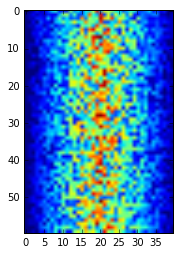

In [31]:
# embed created images in python notebook page so no new tabs are created
%matplotlib inline 
import matplotlib.pyplot
matplotlib.pyplot.imshow(data)

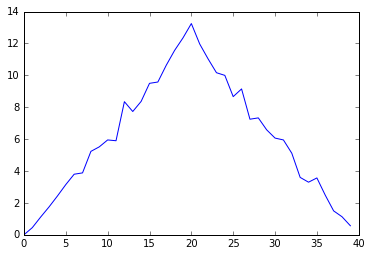

In [32]:
# quickly generate summary statistics across rows or columns using Numpy
ave_inflammation = data.mean(axis=0)

# plot these averages
matplotlib.pyplot.plot(ave_inflammation)

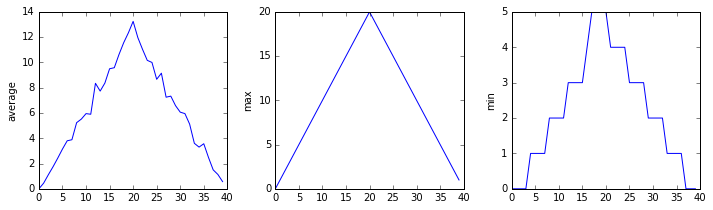

In [34]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(data.mean(axis=0))

axes2.set_ylabel('max')
axes2.plot(data.max(axis=0))

axes3.set_ylabel('min')
axes3.plot(data.min(axis=0))

fig.tight_layout()

matplotlib.pyplot.show(fig)

Here's another example of loading and plotting data using Numpy

Prices for AAPL stock in 2008:
[ 194.84  194.93  180.05  177.64  171.25  179.4   178.02  172.69  178.78
  169.04  159.64  160.89  161.36  155.64  139.07  135.6   130.01  130.01
  131.54  132.18  135.36  133.75  131.65  129.36  122.    121.24  125.48
  129.45  124.86  129.4   127.46  124.63  122.18  123.82  121.54  119.46
  119.74  119.15  122.96  129.91  125.02  121.73  124.62  124.49  120.93
  122.25  119.69  127.35  126.03  127.94  126.61  126.73  132.82  129.67
  133.27  139.53  140.98  145.06  140.25  143.01  143.5   149.53  147.49
  151.61  153.08  155.89  152.84  151.44  154.55  147.14  147.78  148.38
  153.7   154.49  161.04  168.16  160.2   162.89  168.94  169.73  172.24
  175.05  173.95  180.    180.94  184.73  186.66  182.59  185.06  183.45
  188.16  189.96  186.26  189.73  187.62  183.6   185.9   178.19  177.05
  181.17  186.43  187.01  186.69  188.75  186.1   185.37  185.19  189.43
  185.64  181.61  185.64  180.81  173.26  172.37  176.84  181.43  178.75
  180.9   175.27  17

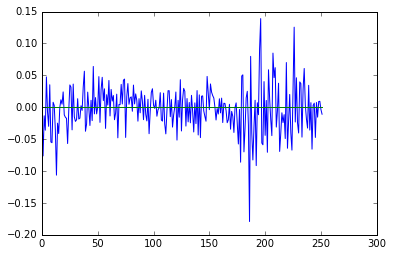

In [35]:
from numpy import arange, loadtxt, zeros
import matplotlib.pyplot as plt

prices = loadtxt("Numpy/calc_return/aapl_2008_close_values.csv", usecols=[1], delimiter=",")

print("Prices for AAPL stock in 2008:")
print(prices)

# calculate return by (closeprice - previouscloseprice)/previouscloseprice
ret = (prices[1:]-prices[:-1])/prices[:-1]
print("Returns after each day in 2008 on AAPL stock:")

base = zeros(len(ret))

plt.plot(ret)
plt.plot(base)
plt.show()

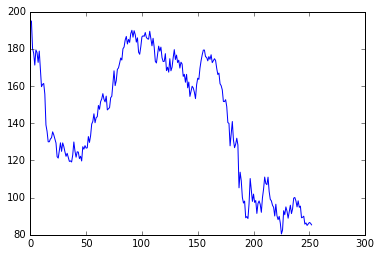

In [36]:
plt.plot(prices)
plt.show()

In [37]:
# use a mask to pick out all the days where the price closed above $175
closeabove150 = prices > 175
print(closeabove150)
prices[closeabove150]

[ True  True  True  True False  True  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True  True  True False
 False  True False False False False False False  True  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True False  True False  True False Fa

array([ 194.84,  194.93,  180.05,  177.64,  179.4 ,  178.02,  178.78,
        175.05,  180.  ,  180.94,  184.73,  186.66,  182.59,  185.06,
        183.45,  188.16,  189.96,  186.26,  189.73,  187.62,  183.6 ,
        185.9 ,  178.19,  177.05,  181.17,  186.43,  187.01,  186.69,
        188.75,  186.1 ,  185.37,  185.19,  189.43,  185.64,  181.61,
        185.64,  180.81,  176.84,  181.43,  178.75,  180.9 ,  175.27,
        177.39,  175.16,  179.55,  176.63,  176.73,  179.3 ,  179.32,
        175.74,  175.39,  175.84,  176.79])

## Loading files using Numpy
>Numpy allows you to easily load and reformat flat files at once.
>This is useful for ignoring header information or comments within the file, so you can easily access data that doesn't have to be optimally 'hygenic'

In [38]:
# here is what the file looks like:
'''
-- THIS IS THE BEGINNING OF THE FILE --
% This is a more complex file to read!

% Day,  Month,  Year, Useless Col, Avg Power
   01,     01,  2000,      ad766,         30
   02,     01,  2000,       t873,         41
% we don't have Jan 03rd!
   04,     01,  2000,       r441,         55
   05,     01,  2000,       s345,         78
   06,     01,  2000,       x273,        134 % that day was crazy
   07,     01,  2000,       x355,         42

%-- THIS IS THE END OF THE FILE --
'''

# Load text/CSV file directly into Numpy array
# skip the first row and the 'useless' column, ignore comments and empty lines
arr = np.loadtxt('complex_data_file.txt', skiprows=1, delimiter=',', usecols=(0,1,2,4), comments='%', dtype='int64')
arr

array([[   1,    1, 2000,   30],
       [   2,    1, 2000,   41],
       [   4,    1, 2000,   55],
       [   5,    1, 2000,   78],
       [   6,    1, 2000,  134],
       [   7,    1, 2000,   42]], dtype=int64)

>This quick loading and cleaning of data is immediately useful.  Let's look at an allSNVs.csv file from a large ERBB2 run.  This file would be too large to open in Excel, but Numpy can handle it with ease and provide us with only the information we want

In [39]:
# the AllSNVs.CSV file headers look like this:
'''
Sample,MutationID,Chromosome,Position,ReferenceBase,AlternateBase,Qual,Filter,Hypothesis,DepthOfCoverage,PercentVariant,PredictedVariant,FunctionalCopiesSample,PercentWildType,LowerBoundWildType,QScoreTrimean,QCorrectedPercentVariant,EndMuts,EndTotal,ReadEndEffect,PositionEffect,StrandBias,MateConcordance,SuraScore,QuantidexCallerScore,SuraScoreNB,BG95,C100,C1000,C500,CMuts,CovRatio,Coverage25Percentile,Coverage75Percentile,DMuts,DOWN10.CSize,DOWN10.DiEntropy,DOWN10.Entropy,DOWN10.GC,DOWN10.HomPol,DOWN15.CSize,DOWN15.DiEntropy,DOWN15.Entropy,DOWN15.GC,DOWN15.HomPol,DOWN20.CSize,DOWN20.DiEntropy,DOWN20.Entropy,DOWN20.GC,DOWN20.HomPol,DOWN5.CSize,DOWN5.DiEntropy,DOWN5.Entropy,DOWN5.GC,DOWN5.HomPol,HypBG95,IQRCoverage,LowerBoundWildType,MAF,MedianCoverage,MinusMutants,MinusOther,MutatedBaseCount,PlusMutants,PlusOther,QScore50Percentile,SuraScoreBB,SuraScoreNBPooled,SuraScoreSelective,TotalPairs,UP10.CSize,UP10.DiEntropy,UP10.Entropy,UP10.GC,UP10.HomPol,UP15.CSize,UP15.DiEntropy,UP15.Entropy,UP15.GC,UP15.HomPol,UP20.CSize,UP20.DiEntropy,UP20.Entropy,UP20.GC,UP20.HomPol,UP5.CSize,UP5.DiEntropy,UP5.Entropy,UP5.GC,UP5.HomPol,RoiEndMuts,RoiEndTotal,RoiMutantPositionMode,RoiOtherPositionMode,RoiPositionEffect,RoiReadEndEffect,COSMICID,CDSCOSMIC,AACOSMIC,SNPID,SNPBuild,MAF,EnsemblGeneSymbol,EnsemblTranscriptID,EnsemblAminoAcidLength,Effect,EffectImpact,FunctionalClass,FeatureRank,CDSChange,AminoAcidChange
'''

# let's load the sample names, mutation ID, reference and alternate base for the SNV, 
# and whether or not the SNV is called for the given sample.
allsnvs = np.loadtxt('MS442allsnvs.csv', 
                     skiprows=1, delimiter=',', usecols=(0,1,4,5,11), 
                     dtype=str)
print(allsnvs[0:4])

[["b'D00029-1-1-AIL099-34915dec54'" "b'1_192134426_T_A'" "b'T'" "b'A'"
  "b'FALSE'"]
 ["b'D00029-1-1-AIL099-34915dec54'" "b'1_192134426_T_C'" "b'T'" "b'C'"
  "b'FALSE'"]
 ["b'D00029-1-1-AIL099-34915dec54'" "b'1_192134426_T_G'" "b'T'" "b'G'"
  "b'FALSE'"]
 ["b'D00029-1-1-AIL099-34915dec54'" "b'1_192134427_C_A'" "b'C'" "b'A'"
  "b'FALSE'"]]


### Pandas 
This package is built on top of Numpy and deals with dataframes much more elegantly

In [40]:
import pandas as pd

In [41]:
MS442 = pd.read_csv('MS442allsnvs.csv')
MS442.head()

C:\Users\cheiser\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sample,MutationID,Chromosome,Position,ReferenceBase,AlternateBase,Qual,Filter,Hypothesis,DepthOfCoverage,...,MAF.1,EnsemblGeneSymbol,EnsemblTranscriptID,EnsemblAminoAcidLength,Effect,EffectImpact,FunctionalClass,FeatureRank,CDSChange,AminoAcidChange
0,D00029-1-1-AIL099-34915dec54,1_192134426_T_A,1,192134426,T,A,.,.,T>A,5767,...,.,RGS18,ENST00000367460,236,INTRON,MODIFIER,SILENT,3,c.283+4857T>A,p.?
1,D00029-1-1-AIL099-34915dec54,1_192134426_T_C,1,192134426,T,C,.,.,T>C,5767,...,.,RGS18,ENST00000367460,236,INTRON,MODIFIER,SILENT,3,c.283+4857T>C,p.?
2,D00029-1-1-AIL099-34915dec54,1_192134426_T_G,1,192134426,T,G,.,.,T>G,5767,...,.,RGS18,ENST00000367460,236,INTRON,MODIFIER,SILENT,3,c.283+4857T>G,p.?
3,D00029-1-1-AIL099-34915dec54,1_192134427_C_A,1,192134427,C,A,.,.,C>A,8267,...,.,RGS18,ENST00000367460,236,INTRON,MODIFIER,SILENT,3,c.283+4858C>A,p.?
4,D00029-1-1-AIL099-34915dec54,1_192134427_C_G,1,192134427,C,G,.,.,C>G,8267,...,.,RGS18,ENST00000367460,236,INTRON,MODIFIER,SILENT,3,c.283+4858C>G,p.?


In [43]:
mydata = MS442[(MS442.PercentVariant > 0.5) & (MS442.DepthOfCoverage > 500)]


In [44]:
mydata.C1000*2

57        1.659322
65        1.659322
314       1.659322
6499      1.659322
6727      1.659322
6785      1.659322
7056      1.659322
7137      1.750847
7145      1.750847
7394      1.750847
7535      1.750847
7789      1.750847
7796      1.750847
7819      1.750847
7844      1.750847
9130      1.750847
13579     1.750847
13807     1.750847
14217     1.981356
14225     1.981356
14424     1.981356
14474     1.981356
14615     1.981356
16210     1.981356
21216     1.981356
21297     1.701695
21305     1.701695
21554     1.701695
27583     1.701695
28025     1.701695
            ...   
424865    1.999153
425064    1.999153
425114    1.999153
431299    1.999153
431527    1.999153
431585    1.999153
431856    1.999153
431945    1.999153
432144    1.999153
432194    1.999153
432335    1.999153
438223    1.999153
438379    1.999153
438607    1.999153
439025    1.999153
439224    1.999153
441010    1.999153
445303    1.999153
446016    1.999153
460257    1.759322
460265    1.759322
460464    1.

In [45]:
def myfunc(x):
    if x < 0:
        return('negative')
    else:
        return('positive')

In [48]:
myfunc('a')

TypeError: unorderable types: str() < int()

In [49]:
%debug

> <ipython-input-45-aca40746f1d8>(2)myfunc()
      1 def myfunc(x):
----> 2     if x < 0:
      3         return('negative')
      4     else:
      5         return('positive')

ipdb> x
'a'
ipdb> q


# Matplotlib

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

## Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
fig = plt.figure()

In [52]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0))
plt.show()

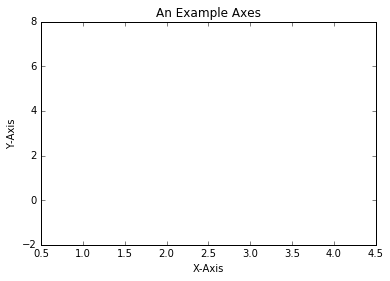

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

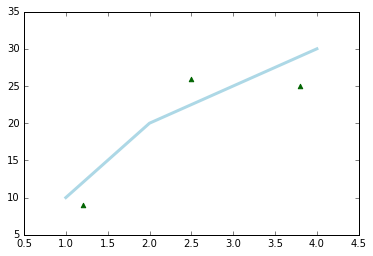

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()
# object-oriented interface removes ambiguity.  Explicitly defines everything you want.

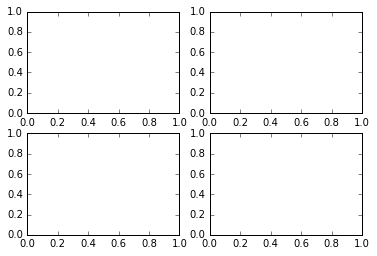

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

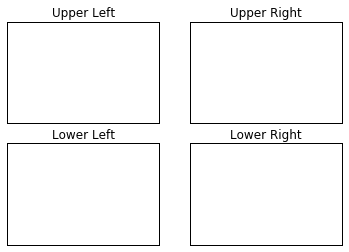

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

### Quick Exercise:

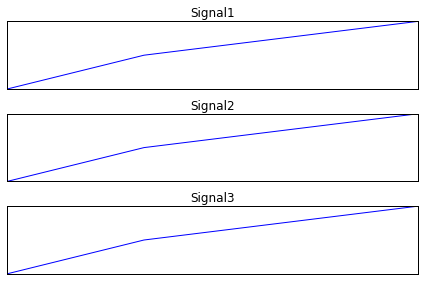

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=1)

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
axes.flat[0].plot([1, 2, 3, 4], [10, 20, 25, 30])
axes.flat[0].set_title('Signal1')
axes.flat[1].plot([1, 2, 3, 4], [10, 20, 25, 30])
axes.flat[1].set_title('Signal2')
axes.flat[2].plot([1, 2, 3, 4], [10, 20, 25, 30])
axes.flat[2].set_title('Signal3')
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()

# Exercise 2.1:

Now let's try combining `bar` and `fill_between` to make a nice prediction of what will happen as this class progresses:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

# Now you're on your own!


In [ ]:
fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x_pred, y_min_pred, y_max_pred, color=fillcolor)

# Plot the "centerline" with `plot`
ax.plot(x_raw, y_raw, color=linecolor)

# Plot the bar plots with bar
ax.bar(x_pos, y_avg, width=bar_width, color=barcolor, yerr = y_err, ecolor = 'gray', edgecolor='gray',
      align='center' # 'edge' is default in 1.5 mpl, but default is 'center' in 2.0
      )

plt.show()